# Machine Problem 2
## Color Transformations

The goal of the machine problem is to apply the concepts of color transformations, specifically using histogram equalization and gamma correction techniques. You are to submit two files for this activity: (1) a Jupyter notebook containing the solutions to the action items. Ensure you provide comments, discussions, and proper section divisions for your code. Please also include your answer to the Guide Questions in the Jupyter Notebook; (2) a PDF version of your Jupyter Notebook. You can provide a link to your submission resources or a zip file. The instructor will run it on their local machine, so make sure the codes and files are accessible and functional. 

In [4]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

## 1. Information Extraction

### 1a. Reshape Images
Given the image dataset, reshape the images to (100,100,3).

### 1b. Saving resized images
Save the transformed images as JPEG files in a separate directory.

In [5]:
input_directory = '../media/dataset2'
output_directory = 'dataset2_resized'

if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Reshape images to (100, 100, 3)
for filename in os.listdir(input_directory):
    if filename.endswith('.png') or filename.endswith('.jpg'):
        img_path = os.path.join(input_directory, filename)
        img = cv.imread(img_path)

        # Resize the image to 100x100 pixels
        img_resized = cv.resize(img, (100, 100))

        # Save the resized image as JPEG in a separate directory
        output_filename = os.path.join(output_directory, filename)
        cv.imwrite(output_filename, img_resized)

### 1c. Color Channels Histogram
Create a histogram for the following channels: Reds, Greens, Blues, Hues, Saturations, Intensities

In [6]:
def plot_combined_histograms(img, img_name):
    # Split the channels for RGB
    b_channel, g_channel, r_channel = cv.split(img)

    # Convert the image to HSV for Hue, Saturation, and Intensity
    hsv_img = cv.cvtColor(img, cv.COLOR_BGR2HSV)
    h_channel, s_channel, v_channel = cv.split(hsv_img)

    # Create a figure with two subplots side by side for each image
    fig, axes = plt.subplots(1, 2, figsize=(12, 3.5))  # 1 row, 2 columns (side by side histograms)

    # Plot combined RGB histograms
    axes[0].hist(r_channel.ravel(), bins=256, color='red', alpha=0.5, label='Red')
    axes[0].hist(g_channel.ravel(), bins=256, color='green', alpha=0.5, label='Green')
    axes[0].hist(b_channel.ravel(), bins=256, color='blue', alpha=0.5, label='Blue')
    axes[0].set_title(f'RGB Combined Histogram ({img_name})',fontsize=10)
    axes[0].set_xlabel('Pixel Intensity')
    axes[0].set_ylabel('Frequency')
    axes[0].legend()

    r_channel.ravel()

    # Plot combined HSV histograms
    axes[1].hist(h_channel.ravel(), bins=256, color='purple', alpha=0.5, label='Hue')
    axes[1].hist(s_channel.ravel(), bins=256, color='orange', alpha=0.5, label='Saturation')
    axes[1].hist(v_channel.ravel(), bins=256, color='gray', alpha=0.5, label='Intensity')
    axes[1].set_title(f'HSV Combined Histogram ({img_name})', fontsize=10)
    axes[1].set_xlabel('Pixel Intensity')
    axes[1].set_ylabel('Frequency')
    axes[1].legend()

    # Adjust layout
    plt.tight_layout()
    plt.show()

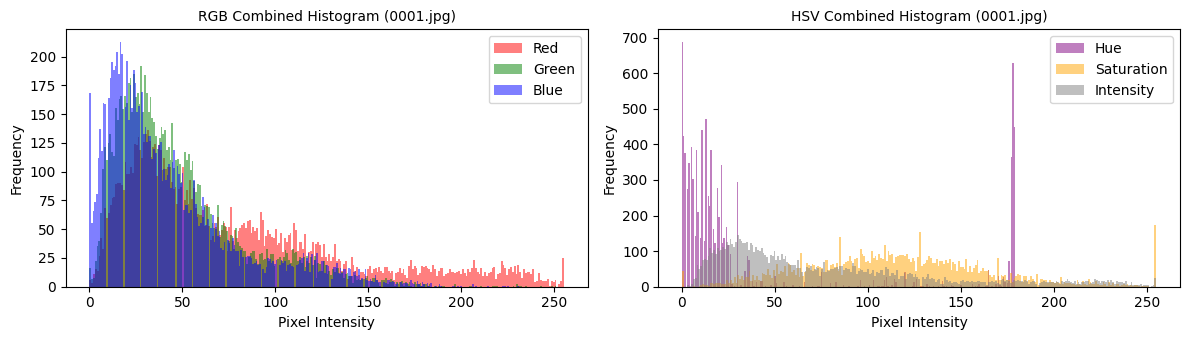

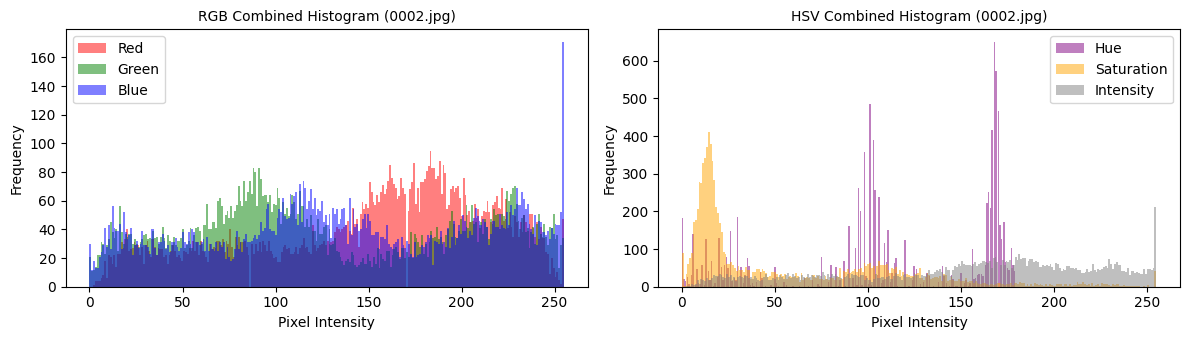

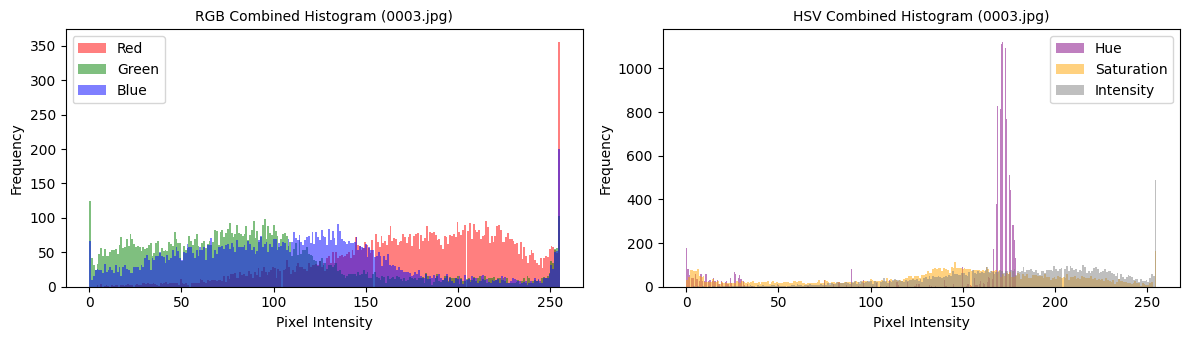

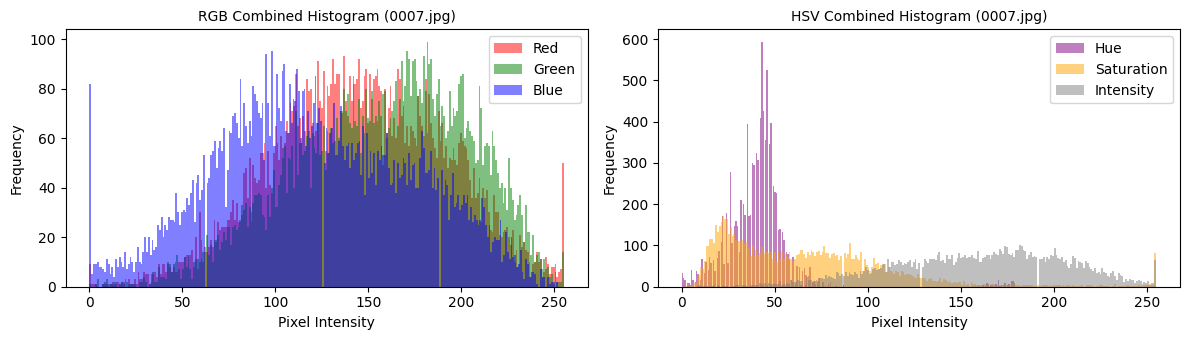

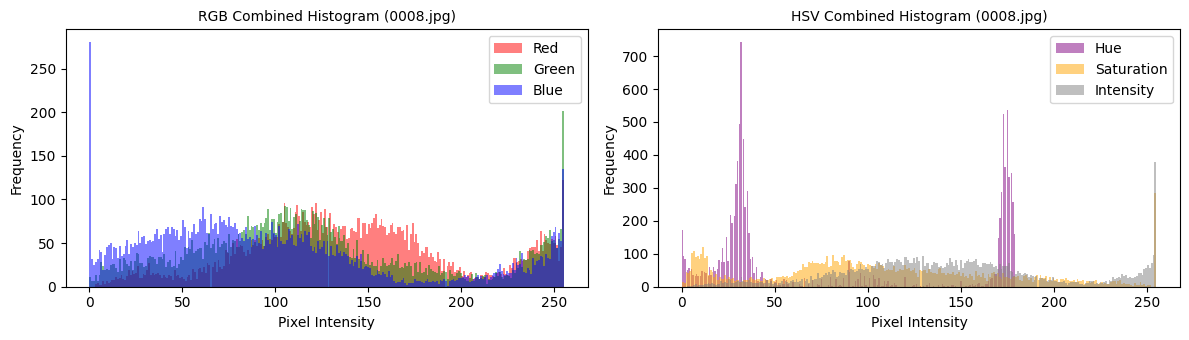

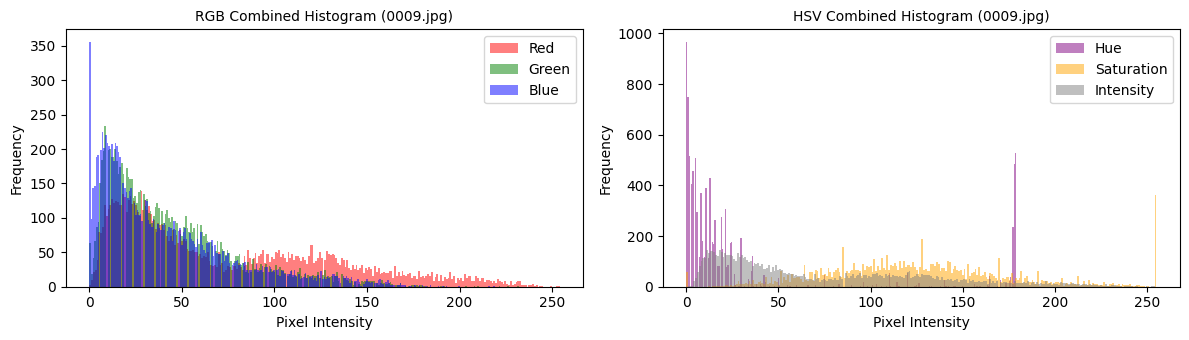

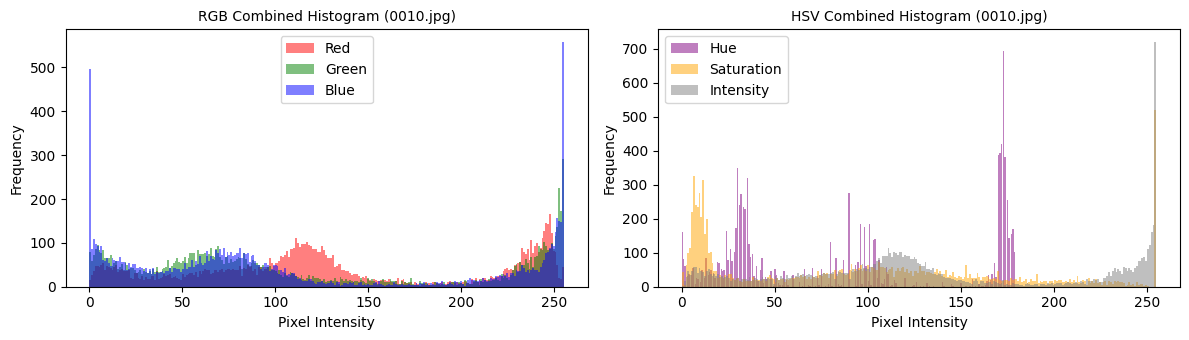

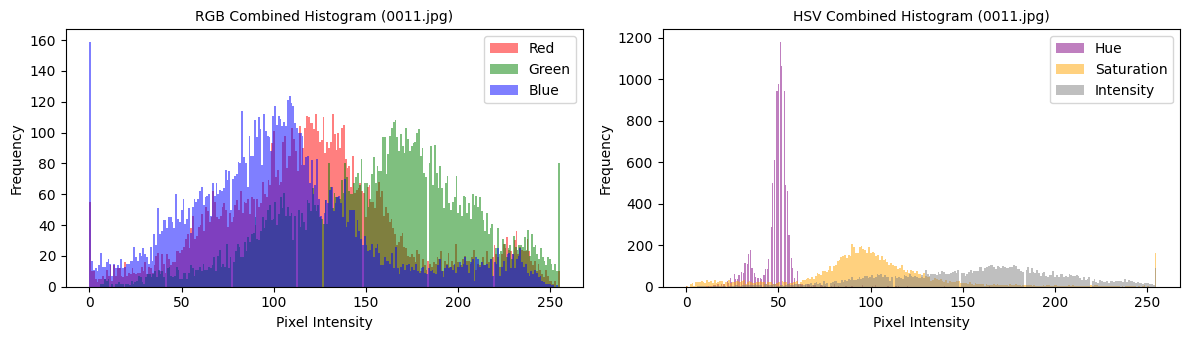

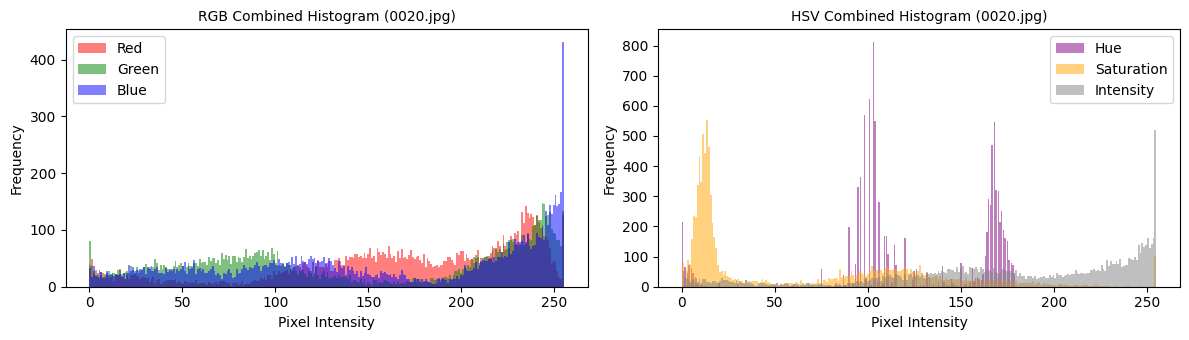

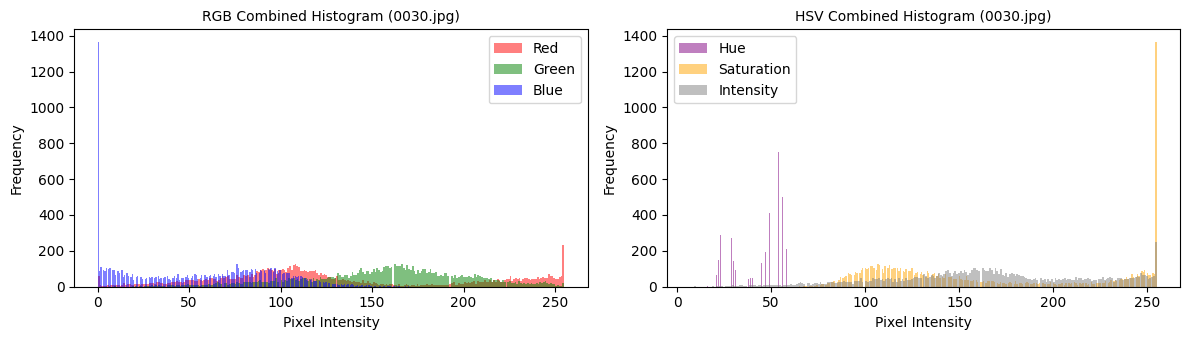

In [7]:
for filename in os.listdir(output_directory):
    if filename.endswith('.jpg'): 
        img_path = os.path.join(output_directory, filename)
        img = cv.imread(img_path)
        
        plot_combined_histograms(img, filename)

### 1d. Guide Questions

<b> 1. In the RGB space, which channel is most likely to be observed for all images? </b>

Blue is the channel most frequently observed across all the images. In almost all of the RGB histograms, the blue channel has a strong peak near 0 intensity (darker values) and another significant peak near 255 (brighter values), indicating its dominance.

<b> 2. In the HSV space, which top three hues are most likely to be observed for all images? </b>

The top three most observed hues across the images, based on the histograms for hue, appear to be concentrated around:
- 0 to 50 (Reddish tones)
- 100 to 150 (Greenish to yellowish tones)
- 150 to 200 (Bluish tones)


## 2. Data Cleaning

Develop a function that attains the following activities:
- Remove all images that are taken during the night.
- Remove all images that are not pink flowers.



### 2a. Removing images taken during the night

In [8]:
def is_night_image(image, brightness_threshold=40):

    gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    mean_brightness = np.mean(gray_image)
    
    return mean_brightness < brightness_threshold

### 2b. Removing images of non-pink flowers

In [78]:
# insert code

### 2c. Guide Questions 

<b> 1. What mathematical or statistical bases have you considered when developing your function? </b>

In developing the first function,...


<b>2. What are the challenges in re-orienting the images in this action item?</b>

The challenges in re-orienting the images in this action item is...


<b>3. What can you suggest for automating such a task?</b>

For automating such a task, we would suggest...

## 3. Data Enhancement
From the cleaned dataset, develop and apply a function that:
* Adjusts the exposure of the images based on the brightest image.
  <i>(Hint: You may manually select the representative image and apply Gamma Correction) </i>
* Adjusts the saturation of the images to match the saturation of the most saturated image.
  <i>(Hint: You may manually select the representative image and apply Histogram Equalization and Channel Arithmetic)</i>

### 3a. Adjust exposure

Displaying image: 0001.jpg


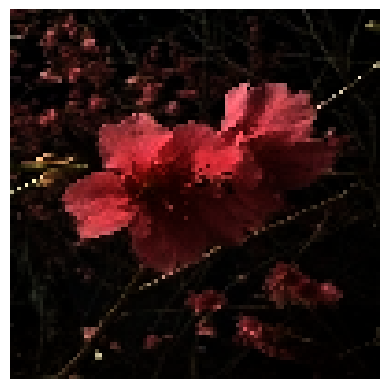

Displaying image: 0002.jpg


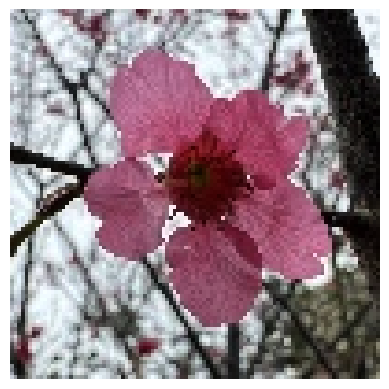

Displaying image: 0003.jpg


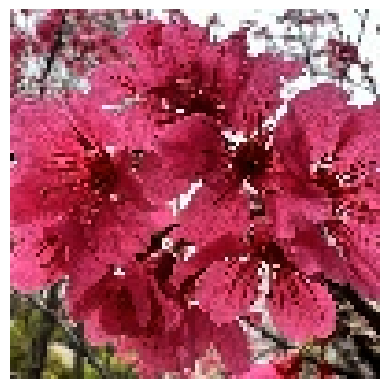

Displaying image: 0007.jpg


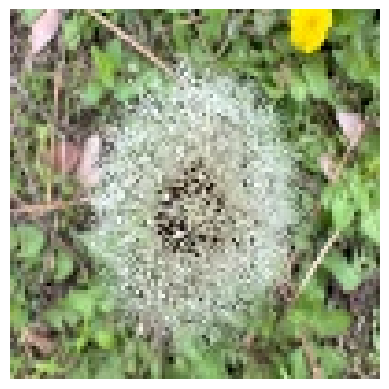

Displaying image: 0008.jpg


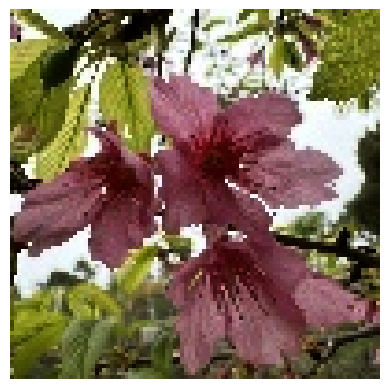

Displaying image: 0009.jpg


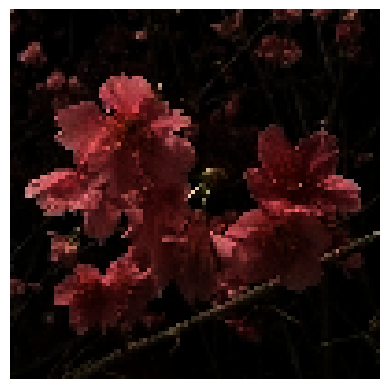

Displaying image: 0010.jpg


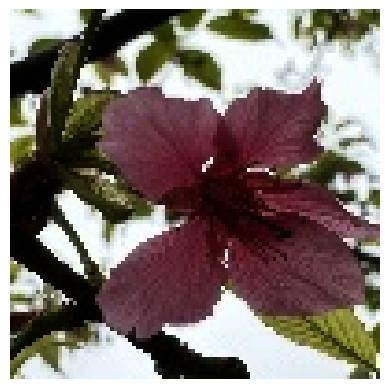

Displaying image: 0011.jpg


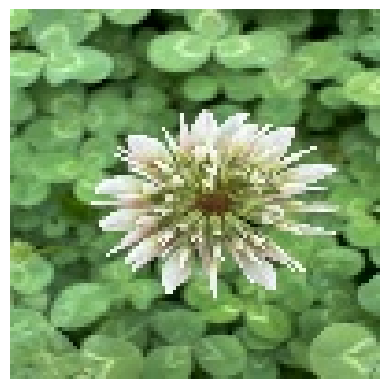

Displaying image: 0020.jpg


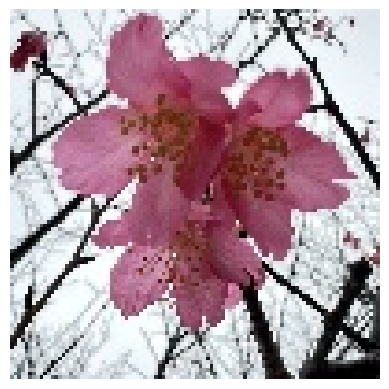

Displaying image: 0030.jpg


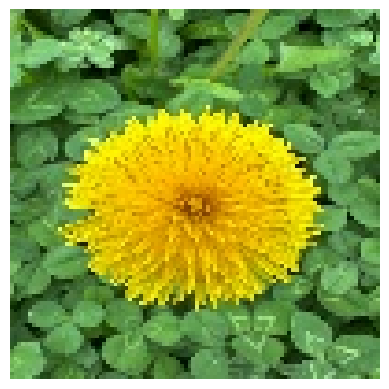

In [11]:
def find_brightest_image(output_directory):

    brightest_image_name = None
    max_brightness = -1  # initialize

    for filename in os.listdir(output_directory):
        if filename.endswith('.jpg'):
            img_path = os.path.join(output_directory, filename)
            img = cv.imread(img_path)

            # calculate average brightness
            gray_image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
            brightness = np.mean(gray_image)

            # update when found
            if brightness > max_brightness:
                max_brightness = brightness
                brightest_image_name = filename

    return brightest_image_name

def adjust_exposure(output_directory):

    bright_image_name = find_brightest_image(output_directory)
    bright_image_path = os.path.join(output_directory, bright_image_name)

    # calculate average brightness
    bright_image = cv.imread(bright_image_path)
    bright_gray = cv.cvtColor(bright_image, cv.COLOR_BGR2GRAY)
    bright_brightness = np.mean(bright_gray)
    target_brightness = bright_brightness

    # adjust exposure based on the brightest image
    for filename in os.listdir(output_directory):
        if filename.endswith('.jpg'):
            img_path = os.path.join(output_directory, filename)
            img = cv.imread(img_path)

            # calculate the brightness and gamma of each image
            gray_image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
            current_brightness = np.mean(gray_image)
            gamma = current_brightness / target_brightness

            # clamp the gamma value to avoid over-darkening or over-brightening
            gamma = max(0.5, min(gamma, 2.0))

            # gamma correction
            inv_gamma = 1.0 / gamma 
            table = np.array([((i / 255.0) ** inv_gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
            adjusted_image = cv.LUT(img, table)

            # display
            print(f"Displaying image: {filename}")
            display_image(adjusted_image)

def display_image(image):
    # convert
    img_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()

adjust_exposure(output_directory)

### 3b. Adjust saturation

Displaying image: 0001.jpg


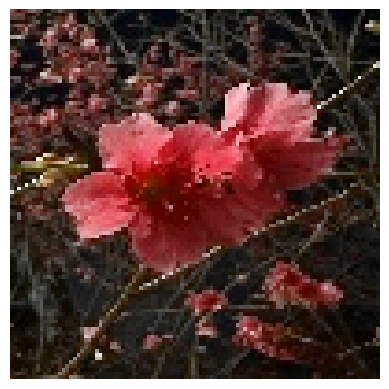

Displaying image: 0002.jpg


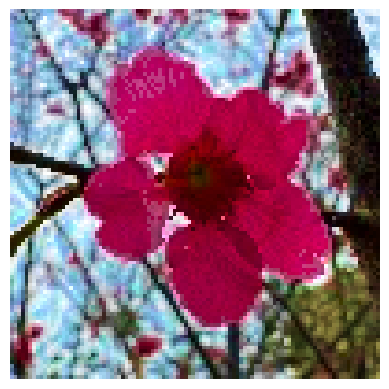

Displaying image: 0003.jpg


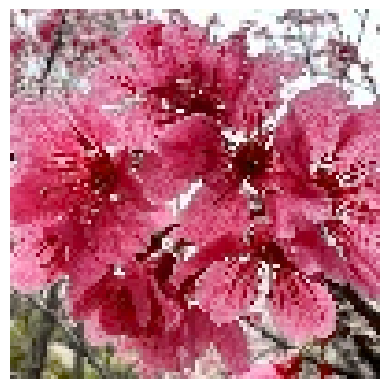

Displaying image: 0007.jpg


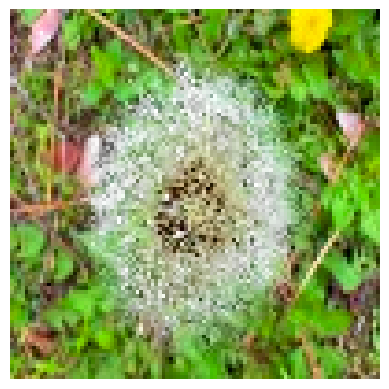

Displaying image: 0008.jpg


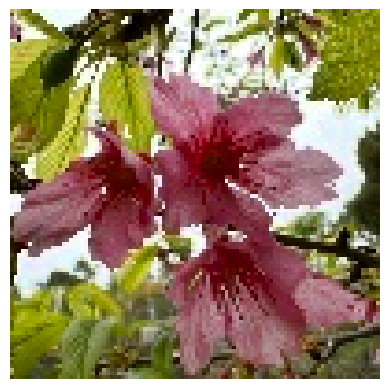

Displaying image: 0009.jpg


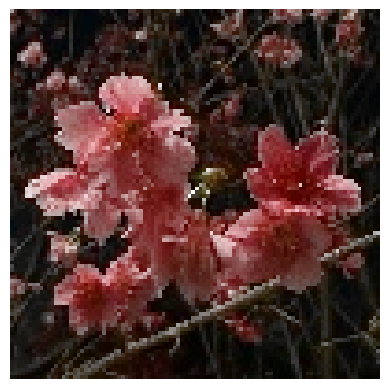

Displaying image: 0010.jpg


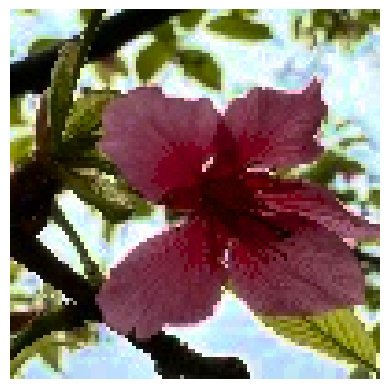

Displaying image: 0011.jpg


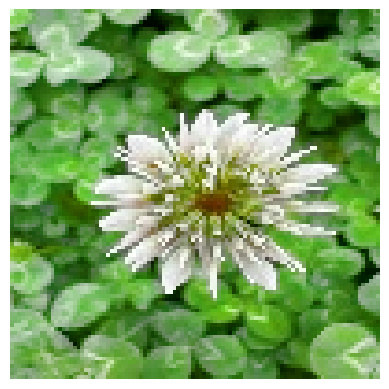

Displaying image: 0020.jpg


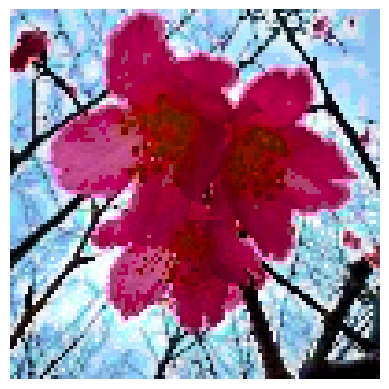

Displaying image: 0030.jpg


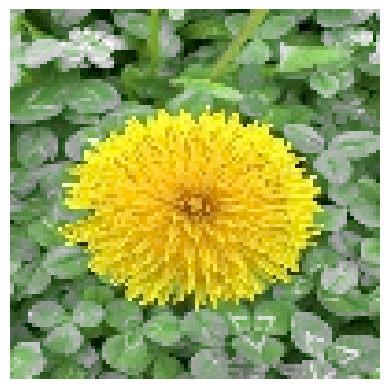

In [12]:
def adjust_saturation(output_directory):
    
    most_saturated_image_name = find_most_saturated_image(output_directory)
    most_saturated_image_path = os.path.join(output_directory, most_saturated_image_name)

    # calculate average saturation
    most_saturated_image = cv.imread(most_saturated_image_path)
    hsv_image = cv.cvtColor(most_saturated_image, cv.COLOR_BGR2HSV)
    most_saturated_value = np.mean(hsv_image[:, :, 1])
    target_saturation = most_saturated_value

    for filename in os.listdir(output_directory):
        if filename.endswith('.jpg'):
            img_path = os.path.join(output_directory, filename)
            img = cv.imread(img_path)

            hsv_img = cv.cvtColor(img, cv.COLOR_BGR2HSV)
            current_saturation = np.mean(hsv_img[:, :, 1])

            scaling_factor = target_saturation / current_saturation

            # adjust the saturation by multiplying the scaling factor
            hsv_img[:, :, 1] = np.clip(hsv_img[:, :, 1] * scaling_factor, 0, 255)

            # apply histogram equalization to enhance saturation contrast
            hsv_img[:, :, 1] = cv.equalizeHist(hsv_img[:, :, 1])

            # convert back after saturation adjustment
            adjusted_img = cv.cvtColor(hsv_img, cv.COLOR_HSV2BGR)

            print(f"Displaying image: {filename}")
            display_image(adjusted_img)

def find_most_saturated_image(output_directory):
    most_saturated_image_name = None
    max_saturation = -1  # initialize

    for filename in os.listdir(output_directory):
        if filename.endswith('.jpg'):
            img_path = os.path.join(output_directory, filename)
            img = cv.imread(img_path)

            # convert image to HSV and calculate average saturation
            hsv_img = cv.cvtColor(img, cv.COLOR_BGR2HSV)
            avg_saturation = np.mean(hsv_img[:, :, 1])

            # update when most saturated is found
            if avg_saturation > max_saturation:
                max_saturation = avg_saturation
                most_saturated_image_name = filename

    return most_saturated_image_name

def display_image(image):
    # convert
    img_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()

adjust_saturation(output_directory)

## 4. Modified Data Augmentation
Reuse the data augmentation functions from MP2 on geometric transformations and add the following augmentation techniques:
- Increase or decrease the saturation.

Reused data augmentation functions from MP1

- Randomly put a black patch over a portion of the image

In [9]:
def random_black_patch(img):
    h, w, _ = img.shape
    patch_size = np.random.randint(10, 30) # randomly selects the size of the black patch, currently set between 10 to 30 pixels
    x1 = np.random.randint(0, w - patch_size) 
    y1 = np.random.randint(0, h - patch_size)
    img[y1:y1+patch_size, x1:x1+patch_size] = 0 # sets the pixels in the selected area to black
    return img

- Shift an image sideward or upwards

In [10]:
def shift_image(img, shift_x, shift_y):
    h, w = img.shape[:2]
    
    # creates a transformation matrix for shifting
    # [1, 0, shift_x] shifts the image by 'shift_x' pixels horizontally
    # [0, 1, shift_y] shifts the image by 'shift_y' pixels vertically
    M = np.float32([[1, 0, shift_x], [0, 1, shift_y]]) 
    shifted_img = cv.warpAffine(img, M, (w, h)) # apply the shifting using the affine transformation
    return shifted_img

- Rotate an image either for

In [11]:
def rotate_image(img, angle):
    h, w = img.shape[:2]
    center = (w // 2, h // 2) # determines the center of the image
    M = cv.getRotationMatrix2D(center, angle, 1.0) # positive angle -> counter clockwise rotation, negative angle -> clockwise rotation
    rotated_img = cv.warpAffine(img, M, (w, h)) # apply the rotation using the affine transformation
    return rotated_img

- Flip an image either vertically or horizontally

In [12]:
def flip_image(image, value):
    return cv.flip(image, value)  # 0 -> vertical, 1 -> horizontal

### 4a. Adjusting saturation

In [13]:
def adjust_saturation(img, saturation_scale=1.0):
    # Convert BGR to HSV
    hsv_img = cv.cvtColor(img, cv.COLOR_BGR2HSV)
    
    # Scale the saturation channel (S)
    hsv_img[:, :, 1] = np.clip(hsv_img[:, :, 1] * saturation_scale, 0, 255)
    
    # Convert back to BGR
    img_with_adjusted_saturation = cv.cvtColor(hsv_img, cv.COLOR_HSV2BGR)
    return img_with_adjusted_saturation

In [14]:
augmented_output_dir = 'modified_dataset2_augmented'
if not os.path.exists(augmented_output_dir): # creates directory if does not exist
    os.makedirs(augmented_output_dir)

In [15]:
def combine_augmentations(image, aug_func1, aug_func2):
    # Apply the first augmentation
    img_aug1 = aug_func1(image.copy())
    # Apply the second augmentation
    img_aug2 = aug_func2(img_aug1)
    return img_aug2

image_count = 0
augmentations = [
    (random_black_patch, 'random_black_patch'),
    (lambda img: shift_image(img, 20, 0), 'shift_right_20px'),
    (lambda img: shift_image(img, 0, -20), 'shift_up_20px'),
    (lambda img: rotate_image(img, 45), 'rotate_45_degrees'),
    (lambda img: flip_image(img, 0), 'flip_vertically'),
    (lambda img: flip_image(img, 1), 'flip_horizontally'),
    (lambda img: adjust_saturation(img, 1.5), 'increase_saturation_1.5'),
    (lambda img: adjust_saturation(img, 0.5), 'decrease_saturation_0.5'),
]

for filename in os.listdir(output_directory):
    if filename.endswith('.jpg'):
        img_path = os.path.join(output_directory, filename)
        image = cv.imread(img_path)

        # Save the original resized image
        cv.imwrite(os.path.join(augmented_output_dir, filename), image)
        image_count += 1

        # Save the augmented images (single and combined)
        for i in range(len(augmentations)):
            # Single augmentations
            aug_func, aug_desc = augmentations[i]
            output_filename = f'{filename.split(".")[0]}_{aug_desc}.jpg'
            cv.imwrite(os.path.join(augmented_output_dir, output_filename), aug_func(image.copy()))
            image_count += 1
            
            # Combine augmentations 
            for j in range(i + 1, len(augmentations)):
                aug_func2, aug_desc2 = augmentations[j]
                combined_image = combine_augmentations(image, aug_func, aug_func2)
                output_filename_combined = f'{filename.split(".")[0]}_{aug_desc}_{aug_desc2}.jpg'
                cv.imwrite(os.path.join(augmented_output_dir, output_filename_combined), combined_image)
                image_count += 1
            
            # Stop if already reached 150 images
            if image_count >= 150:
                break

    if image_count >= 150:
        break
